In [1]:
# Initalize LLM
from langchain_openai import ChatOpenAI
from langchain_community.chat_models import ChatOllama

# Generate the chat interface, including the tools
llm = ChatOpenAI(
    model="mistral",
    openai_api_key="ollama",
    base_url="http://localhost:11434/v1",
)

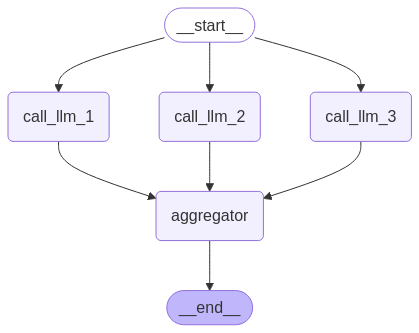

Here's a story, joke, and poem about cats!

STORY:
 Title: Whiskers of Destiny

In the enchanting valley of Felinia, where the sun kissed the tall, mystical catnip plants and the moonlit twilight whispered tales of old, an extraordinary feline fellowship thrived. The valley was home to an assortment of cats: the regal Siamese named King Pharaoh, wise old Manx known as Seer Munk, nimble-footed Bengal known only as "Ninja," and the timid yet cunning tabby, Mystery.

One fine day, as the sun draped its golden cloak over the hills of Felinia, a hush fell upon the valley. The cats exchanged uneasy purrs and glances; they sensed that something was amiss. Tales of dark forces stirring in neighboring regions echoed through the whispers that danced among the tall grasses.

King Pharaoh convened his council, calling for wisdom from Munk and stealth from Ninja to unveil the source of the chaos that threatened their peaceful valley home. The three feline leaders ventured forth together, guided by 

In [3]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

# Graph state
class State(TypedDict):
    topic: str
    joke: str
    story: str
    poem: str
    combined_output: str


# Nodes
def call_llm_1(state: State):
    """First LLM call to generate initial joke"""

    msg = llm.invoke(f"Write a joke about {state['topic']}")
    return {"joke": msg.content}


def call_llm_2(state: State):
    """Second LLM call to generate story"""

    msg = llm.invoke(f"Write a story about {state['topic']}")
    return {"story": msg.content}


def call_llm_3(state: State):
    """Third LLM call to generate poem"""

    msg = llm.invoke(f"Write a poem about {state['topic']}")
    return {"poem": msg.content}


def aggregator(state: State):
    """Combine the joke and story into a single output"""

    combined = f"Here's a story, joke, and poem about {state['topic']}!\n\n"
    combined += f"STORY:\n{state['story']}\n\n"
    combined += f"JOKE:\n{state['joke']}\n\n"
    combined += f"POEM:\n{state['poem']}"
    return {"combined_output": combined}


# Build workflow
parallel_builder = StateGraph(State)

# Add nodes
parallel_builder.add_node("call_llm_1", call_llm_1)
parallel_builder.add_node("call_llm_2", call_llm_2)
parallel_builder.add_node("call_llm_3", call_llm_3)
parallel_builder.add_node("aggregator", aggregator)

# Add edges to connect nodes
parallel_builder.add_edge(START, "call_llm_1")
parallel_builder.add_edge(START, "call_llm_2")
parallel_builder.add_edge(START, "call_llm_3")
parallel_builder.add_edge("call_llm_1", "aggregator")
parallel_builder.add_edge("call_llm_2", "aggregator")
parallel_builder.add_edge("call_llm_3", "aggregator")
parallel_builder.add_edge("aggregator", END)
parallel_workflow = parallel_builder.compile()

# Show workflow
display(Image(parallel_workflow.get_graph().draw_mermaid_png()))

# Invoke
state = parallel_workflow.invoke({"topic": "cats"})
print(state["combined_output"])